# <span style="color:red"> Estimating a population parameter from a sample - a simulation experiment</span>

In [4]:
# Import modules 

import numpy as np
from datascience import *
# from datascience_extensions import *
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import os.path
from scipy.stats import chi2

A summary of the methods for Table is [here](http://data8.org/datascience/tables.html) <br>
A tutorial for the datascience module is [here](http://data8.org/datascience/tutorial.html) <br>
A cheatsheet for the datascience module is [here](https://github.com/wstuetzle/STAT180/blob/master/Computing/data8_sp17_midterm_ref_sheet.pdf)

** Scenario: **

We are given a cases x variables matrix in the form of a datascience Table. Let's call this table "Population". Let N be the number of rows of Population

By a "Statistic" we mean a function that can be applied to any collection of rows of Population and produces a number.

Define the Population_parameter as the value of Statistic(Population).

A size n random Sample of Population is a subset of n rows of Population chosen so that any
of the N^n subsets has the same chance of being drawn as any other.

The natural estimate for the population parameter from a Sample is Statistic(Sample).

We want to experimentally explore the perfomance of this estimate for different populations, Statistics, and sample sizes.

### <span style="color:blue"> Make a Population table </span>

The flight delay data we used in the in-class experiment were heavily skewed and also discrete. In this Lab you will re-run the experiments using a population with a less extreme distribution.

In [37]:
N = 10000   # Population size
df = 10
population_filename = "chi2-10df.csv"

# values = chi2.rvs(df, size = N)
# Population = Table().with_columns("Value", values)
# Population.to_csv(population_filename)

Population = Table.read_table(population_filename)

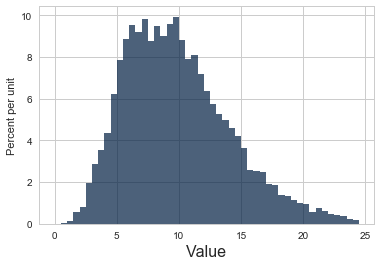

In [40]:
Population.hist("Value", bins = np.arange(0, 25, 0.5))

In [41]:
# Here is a function that evaluates the Statistic for num_samples samples 
# of size sample_size from the Population, drawn with replacement

def evaluate_statistic_for_random_samples(Statistic, sample_size, num_samples, 
                                          with_replacement = True):
    estimates = np.zeros(num_samples)
    for i in range(num_samples):
        sample = Population.sample(sample_size, with_replacement)
        estimates[i] = Statistic(sample)
        if i % 10000 == 0:
            print(str(i) + " ", end = "")
    return(estimates)

In [42]:
# Choose sample sizes and number or samples to be drawn

sample_sizes = [4, 16, 64, 256, 1024]
num_samples = 100000    

### <span style="color:purple"> Setup for Statistic = mean </span>

In [19]:
def Statistic (table):
    return(np.mean(table.column("Value")))

Population_parameter = Statistic(Population)
Population_std = np.std(Population.column("Value"))
print("Population parameter = " + str(Population_parameter))
print("Population std = " + str(Population_std))

estimates_filename = "mean-with-replacement.csv"
file_exists = os.path.isfile(estimates_filename)
if file_exists:
    estimates_tab = Table.read_table(estimates_filename)

if not file_exists: 
    estimates_tab = Table()
    for n in sample_sizes:
        estimates = evaluate_statistic_for_random_samples(Statistic, n, num_samples)
        estimates_tab = estimates_tab.with_column(str(n), estimates)
    estimates_tab.to_csv(estimates_filename)

estimates_tab.show(5)

Population parameter = 9.96919492937
Population std = 4.38527052843
0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 

4,16,64,256,1024
10.5376,11.1174,10.1148,9.39295,10.0983
5.13655,10.3099,9.8793,9.71949,9.60732
10.4835,8.83287,10.8263,9.98116,9.90767
8.43024,11.0642,9.72256,10.034,10.2236
8.29482,8.13307,10.7404,10.3264,10.0387


### <span style="color:purple"> Setup for Statistic = std </span>

In [26]:
def Statistic (table):
    return(np.std(table.column("Value")))

Population_parameter = Statistic(Population)
Population_std = np.std(Population.column("Value"))
print("Population parameter = " + str(Population_parameter))
print("Population std = " + str(Population_std))

estimates_filename = "std-with-replacement.csv"
file_exists = os.path.isfile(estimates_filename)
if file_exists:
    estimates_tab = Table.read_table(estimates_filename)
    
if not file_exists: 
    estimates_tab = Table()
    for n in sample_sizes:
        estimates = evaluate_statistic_for_random_samples(Statistic, n, num_samples)
        estimates_tab = estimates_tab.with_column(str(n), estimates)
    estimates_tab.to_csv(estimates_filename)

estimates_tab.show(5)

Population parameter = 4.38527052843
Population std = 4.38527052843
0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 

4,16,64,256,1024
4.94974,6.48251,4.27803,4.49624,4.3366
3.70208,3.43766,4.93272,4.20469,4.35802
1.75724,3.88154,4.99514,4.78088,4.46674
1.67234,3.16289,3.77743,4.46263,4.5882
5.28403,5.32289,4.13897,4.36902,4.29945


### <span style="color:purple"> Setup for Statistic = median </span>

In [30]:
def Statistic (table):
    return(np.median(table.column("Value")))

Population_parameter = Statistic(Population)
Population_std = np.std(Population.column("Value"))
print("Population parameter = " + str(Population_parameter))
print("Population std = " + str(Population_std))

estimates_filename = "median-with-replacement.csv"
file_exists = os.path.isfile(estimates_filename)
if file_exists:
    estimates_tab = Table.read_table(estimates_filename)
    
if not file_exists: 
    estimates_tab = Table()
    for n in sample_sizes:
        estimates = evaluate_statistic_for_random_samples(Statistic, n, num_samples)
        estimates_tab = estimates_tab.with_column(str(n), estimates)
    estimates_tab.to_csv(estimates_filename)

estimates_tab.show(5)

Population parameter = 9.41212335073
Population std = 4.38527052843
0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 0 10000 20000 30000 40000 50000 60000 70000 80000 90000 

4,16,64,256,1024
8.34806,9.985,9.82341,9.28647,9.17205
10.6255,8.21483,9.53333,9.40408,9.53938
7.7944,9.78073,10.2941,9.37298,9.68116
7.39338,11.3707,8.78487,9.91786,9.25463
9.46434,7.57579,9.97706,9.78028,9.42943


###  <span style="color:purple"> 1. Calculate the average of the estimates for the different sample sizes </span>

In [31]:
ns = len(sample_sizes)
for i in np.arange(ns):
    ave_of_estimates = np.mean(estimates_tab.column(i))
    print("n = " + str(sample_sizes[i]) + "  average_of_estimates = " + str(ave_of_estimates))
print("population parameter = " + str(Population_parameter))

n = 4  average_of_estimates = 9.62682094644
n = 16  average_of_estimates = 9.42082022438
n = 64  average_of_estimates = 9.39081755702
n = 256  average_of_estimates = 9.39201299708
n = 1024  average_of_estimates = 9.39785494129
population parameter = 9.41212335073


### <span style="color:purple"> 2. Draw histograms of the estimates for the different sample sizes </span>

First all on the same scale

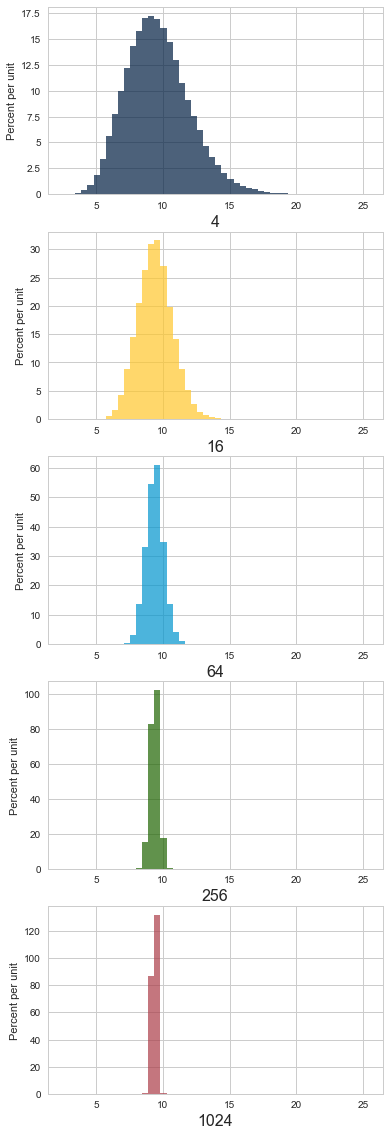

In [32]:
num_bins = 50
overall_min = np.min(estimates_tab.column(0))
overall_max = np.max(estimates_tab.column(0))
for i in np.arange(1, estimates_tab.num_columns):
    the_min = np.min(estimates_tab.column(i))
    the_max = np.max(estimates_tab.column(i))
    if the_min < overall_min:
        overall_min = the_min
    if the_max > overall_max:
        overall_max = the_max
overall_range = overall_max - overall_min
hist_min = overall_min - 0.01 * overall_range
hist_max = overall_max + 0.01 * overall_range
the_bins = np.arange(hist_min, hist_max, overall_range / num_bins)
estimates_tab.hist(estimates_tab.labels, bins = the_bins, overlay = False)     

Now on individual scales

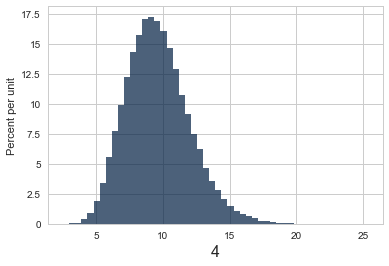

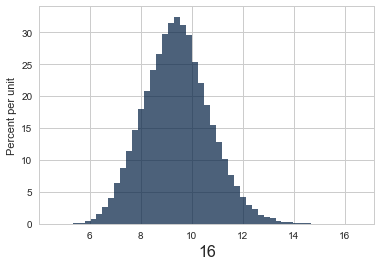

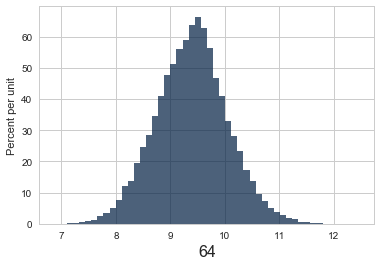

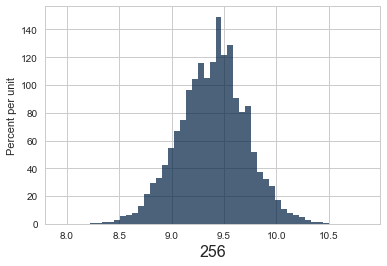

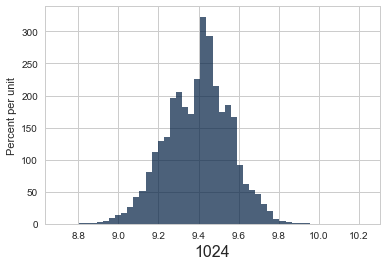

In [33]:
num_bins = 50
for i in np.arange(estimates_tab.num_columns):
    the_label = estimates_tab.labels[i]
    the_min = np.min(estimates_tab.column(i))
    the_max = np.max(estimates_tab.column(i))
    the_range = the_max - the_min
    hist_min = the_min - 0.01 * the_range
    hist_max = the_max + 0.01 * the_range
    the_bins = np.arange(hist_min, hist_max, the_range / num_bins)
    estimates_tab.hist(i, bins = the_bins, overlay = False)
    


### <span style="color:purple"> 3. Calculate the std of the estimates for the different sample sizes

In [34]:
print("Population std = " + str(Population_std))
for i in np.arange(estimates_tab.num_columns):
    std_of_estimates = np.std(estimates_tab.column(i))
    print("n = " + str(sample_sizes[i]) + "  std_of_estimates = " \
          + str(std_of_estimates), end = "")
    print("  std of estimates * n^0.5 = " + str(std_of_estimates * sample_sizes[i] ** 0.5))

Population std = 4.38527052843
n = 4  std_of_estimates = 2.36396800644  std of estimates * n^0.5 = 4.72793601289
n = 16  std_of_estimates = 1.2893263595  std of estimates * n^0.5 = 5.157305438
n = 64  std_of_estimates = 0.654914992036  std of estimates * n^0.5 = 5.23931993629
n = 256  std_of_estimates = 0.321735237555  std of estimates * n^0.5 = 5.14776380087
n = 1024  std_of_estimates = 0.15918178263  std of estimates * n^0.5 = 5.09381704416


### <span style="color:purple"> 4. Calculate the fraction of estimates that are within +- 2 * (std of estimates) from the population parameter </span>.

In [24]:
for i in np.arange(estimates_tab.num_columns):
    lab = estimates_tab.labels[i]
    std_of_estimates = np.std(estimates_tab.column(i))
    estimates_within = estimates_tab.where(lab, are.between((Population_parameter - 2 * std_of_estimates),
                                                            (Population_parameter + 2 * std_of_estimates)))
    fraction_within = estimates_within.num_rows / estimates_tab.num_rows
    print("n = " + lab + "  fraction within interval = " + str(fraction_within))


n = 4  fraction within interval = 0.95745
n = 16  fraction within interval = 0.95489
n = 64  fraction within interval = 0.9546
n = 256  fraction within interval = 0.9541
n = 1024  fraction within interval = 0.95467


### <span style="color:purple"> Summary of results </span>

** Statistic = mean **

* The sample mean is an unbiased estimate of the population mean. (Can be shown mathematically and does not depend
  on the population distribution)
  
  
* The standard deviation of the sample means is (population std) / n^0.5, where n is the sample size. (Can be shown mathematically and does not depend on the population distribution)


* As the sample size n grows, the distribution of the sample means approximates the bell-shaped curve (Gaussian   distribution) (Can be shown mathematically)


* For sufficiently large sample size, approximately 95% of sample means are between (population mean - 2 std of sample means) and (population mean + 2 std of sample means)


<br>

** Statistic = std **

* The sample std is a biased estimate of the population std, but the bias decreases as the sample size n increases


* The standard deviation of the sample stds decreases like 1 / n^0.5 but it does depend on other properties of the population distribution besides the population standard deviation.


*  As the sample size n grows, the distribution of the sample stds approximates the bell-shaped curve (Gaussian   distribution) (Can be shown mathematically)


* For sufficiently large sample size, approximately 95% of sample stds are between (population std - 2 std of sample stds) and (population mean + 2 std of sample stds)

<br>

** Statistics = median **

* The sample median is a biased estimate of the population median, but the bias decreases as the sample size n increases


* The standard deviation of the sample medians decreases like 1 / n^0.5 for most population distributions, but it does depend on other properties of the population distribution besides the population standard deviation.


*  If the population distribution is discrete (as in our example), the distribution of the sample medians may not approximate a bell shaped curve.



